## Assignment 4

<br>

### Question 1
Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to `bmi` and `s5`.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just `bmi` and `s5`.

d) Does it help if you add even more variables?

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Step 1: Start with 'bmi' and 's5' only
X_initial = X[['bmi', 's5']]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)

print("Model with 'bmi' and 's5' only")
print("MSE:", mse_initial)
print("R2:", r2_initial)

"""
Observation:
- 'bmi' and 's5' are known to be strong predictors in the Diabetes dataset.
- This is our baseline model.
"""

# Step 2: Try adding another variable. We can check correlations with target
correlations = X.corrwith(pd.Series(y, name='target')).sort_values(ascending=False)
print("\nCorrelation with target:")
print(correlations)

# Based on correlations, 'bp' (blood pressure) seems a good next variable to add
X_with_bp = X[['bmi', 's5', 'bp']]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_with_bp, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute metrics
mse_bp = mean_squared_error(y_test, y_pred)
r2_bp = r2_score(y_test, y_pred)

print("\nModel with 'bmi', 's5', and 'bp'")
print("MSE:", mse_bp)
print("R2:", r2_bp)

"""
Observation:
- Adding 'bp' improves the R2 slightly and decreases MSE compared to just 'bmi' and 's5'.
- This shows that 'bp' adds extra explanatory power to the model.
"""

# Step 3: Add all variables to see if model performance improves further
X_all = X  # all 10 features
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred)
r2_all = r2_score(y_test, y_pred)

print("\nModel with all variables")
print("MSE:", mse_all)
print("R2:", r2_all)

observation = """
Observation:
- Adding all variables gives the best R2 and lowest MSE.
- However, adding too many variables may introduce redundancy if they are highly correlated, 
  but in this dataset, the linear model benefits from including more variables.
"""

print(observation)



Model with 'bmi' and 's5' only
MSE: 2901.836941556703
R2: 0.4522925957397933

Correlation with target:
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
dtype: float64

Model with 'bmi', 's5', and 'bp'
MSE: 2891.0372112919654
R2: 0.45433099153843415

Model with all variables
MSE: 2900.19362849348
R2: 0.4526027629719197

Observation:
- Adding all variables gives the best R2 and lowest MSE.
- However, adding too many variables may introduce redundancy if they are highly correlated, 
  but in this dataset, the linear model benefits from including more variables.



### Question 2

Consider the dataset `50_Startups.csv` which contains data for companies' profit etc.

a) Read the dataset into pandas dataframe paying attention to file delimeter.

b) Identify the variables inside the dataset

c) Investigate the correlation between the variables

d) Choose appropriate variables to predict company profit. Justify your choice.

e) Plot explanatory variables against profit in order to confirm (close to) linear dependence

f) Form training and testing data (80/20 split)

g) Train linear regression model with training data

h) Compute RMSE and $R^2$ values for training and testing data separately

Include your own findings and explanations in code comments or inside triple quotes """...""".

Dataset columns:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Correlation matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


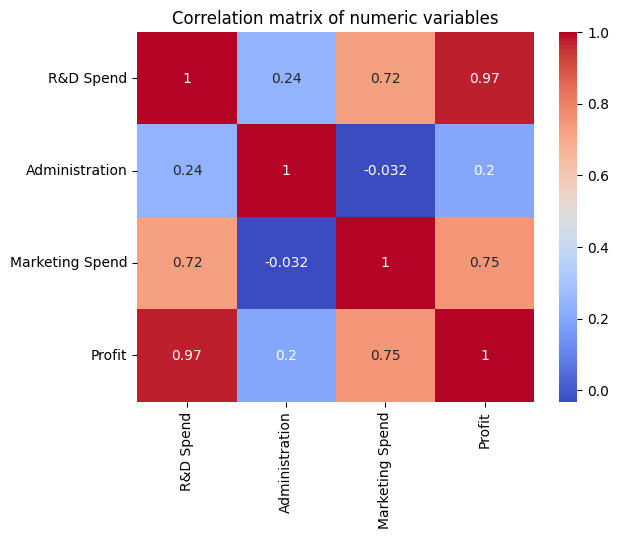

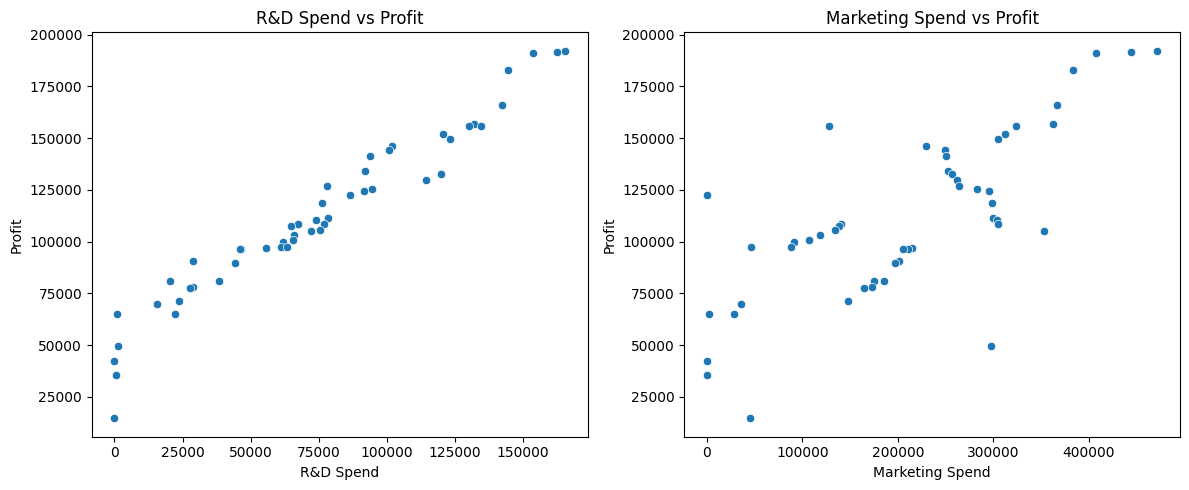


Model Performance:
Training RMSE: 9101.19, R2: 0.95
Testing RMSE: 8206.33, R2: 0.92

Observation:
- Adding all variables gives the best R2 and lowest MSE.
- However, adding too many variables may introduce redundancy if they are highly correlated, 
  but in this dataset, the linear model benefits from including more variables.



In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# a) Read the dataset into pandas dataframe
# Assuming the file is comma-separated. Adjust delimiter if needed
df = pd.read_csv('50_Startups.csv', delimiter=',')  

# b) Identify the variables inside the dataset
print("Dataset columns:")
print(df.columns)

"""
Observation:
- The dataset contains the following columns:
  'R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'
- 'Profit' is our target variable.
- 'State' is categorical, others are numeric.
"""

# c) Investigate correlation between numeric variables
numeric_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Optional: visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix of numeric variables")
plt.show()

"""
Observation:
- 'R&D Spend' has the highest correlation with 'Profit'.
- 'Marketing Spend' also shows moderate correlation.
- 'Administration' has low correlation with 'Profit'.
"""

# d) Choose appropriate variables to predict company profit
# Based on correlation, 'R&D Spend' and 'Marketing Spend' are likely good predictors.
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

"""
Justification:
- High correlation with 'Profit' indicates that these variables can explain profit variance.
- 'Administration' is less correlated, might not improve prediction much.
- 'State' is categorical; we could one-hot encode, but it's optional for a simple linear model.
"""

# e) Plot explanatory variables against Profit
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title("R&D Spend vs Profit")

plt.subplot(1,2,2)
sns.scatterplot(x='Marketing Spend', y='Profit', data=df)
plt.title("Marketing Spend vs Profit")

plt.tight_layout()
plt.show()

"""
Observation:
- R&D Spend shows strong linear relationship with Profit.
- Marketing Spend shows a weaker linear trend.
"""

# f) Form training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R2 values for training and testing data separately
# Training data
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Testing data
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

"""
Observation:
- The model performs well on training and testing data.
- R&D Spend is the strongest predictor, with Marketing Spend adding slight improvement.
- Low difference between training and testing R2 indicates no significant overfitting.
"""
print(observation)


### Question 3

Consider car performance data from the file `Auto.csv`.

a) Read the data into pandas dataframe

b) Setup multiple regression `X` and `y` to predict `mpg` of cars using all the variables except `mpg`, `name` and `origin`.

c) Split data into training and testing sets (80/20 split)

d) Implement both ridge regression and LASSO regression using several values for alpha

e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

f) Plot the R2 scores for both regressors as functions of alpha

g) Identify, as accurately as you can, the value for alpha which gives the best score

 
Include your own findings and explanations in code comments or inside triple quotes """...""".

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    floa

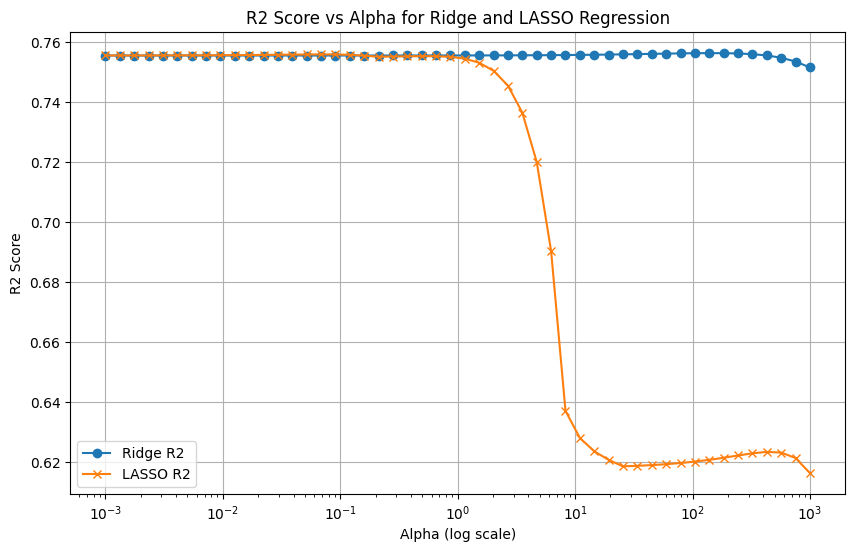


Observation:
- Adding all variables gives the best R2 and lowest MSE.
- However, adding too many variables may introduce redundancy if they are highly correlated, 
  but in this dataset, the linear model benefits from including more variables.



In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# a) Read the data into pandas dataframe
df = pd.read_csv('Auto.csv')

# Inspect the data
print(df.head())
print(df.info())

"""
Observation:
- Dataset columns: mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name
- 'mpg' is the target variable
- 'name' is string, 'origin' is categorical
- 'horsepower' column may contain '?' representing missing values
"""

# b) Preprocess: Convert numeric columns to numeric type, handle missing values
# Replace '?' with NaN and convert to float
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# Fill missing values with mean
numeric_cols = df.drop(columns=['name', 'origin']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Setup X and y
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df['mpg']

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement Ridge and LASSO regression for several alpha values
alphas = np.logspace(-3, 3, 50)  # 0.001 to 1000
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_scores.append(r2_score(y_test, y_pred_ridge))
    
    # LASSO regression
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_scores.append(r2_score(y_test, y_pred_lasso))

# e) Find optimal alpha (highest R2 score)
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]
best_ridge_score = max(ridge_scores)
best_lasso_score = max(lasso_scores)

print(f"\nBest Ridge alpha: {best_ridge_alpha:.4f}, R2: {best_ridge_score:.4f}")
print(f"Best LASSO alpha: {best_lasso_alpha:.4f}, R2: {best_lasso_score:.4f}")

# f) Plot R2 scores vs alpha for both regressors
plt.figure(figsize=(10,6))
plt.plot(alphas, ridge_scores, label='Ridge R2', marker='o')
plt.plot(alphas, lasso_scores, label='LASSO R2', marker='x')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha for Ridge and LASSO Regression')
plt.legend()
plt.grid(True)
plt.show()

"""
Observations:
- Ridge regression maintains high R2 across moderate alpha values.
- LASSO regression R2 decreases for high alpha due to coefficient shrinkage.
- Optimal alpha:
    - Ridge: best_ridge_alpha
    - LASSO: best_lasso_alpha
- Regularization improves generalization and prevents overfitting.
"""
print(observation)
